In [1]:
%cd /Users/aravindhswaminathan/Documents/GitHub/TwoSidedYSYK
from SYK_fft import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ConformalAnalytical import *

/Users/aravindhswaminathan/Documents/GitHub/TwoSidedYSYK


In [2]:
Nbig = int(2**18)
err = 1e-2

#beta = 50
beta = 1000
#mu = 0.001
mu = 0.000
J = 1.0
lamb = 0.03
print('T = ', 1/beta, ', mu = ', mu, ' lambda = ', lamb)

omega = (2 * np.arange(Nbig) - Nbig + 1) * np.pi/beta
tau = (np.arange(Nbig) + 1./2) * beta/Nbig

T =  0.001 , mu =  0.0  lambda =  0.03


# Complex SYK wormhole in Imaginary time SD equations

\begin{align}
    \det(M) &= \left(-i\omega_n - \mu - \Sigma_{11}\right)^2 + \left(i\lambda - \Sigma_{12}\right)^2 \\
    G_{11}(i\omega_n) &= \frac{-i\omega_n-\mu-\Sigma_{11}(i\omega_n)}{\det(M)} \\
    G_{12}(i\omega_n) &= \frac{-i\lambda + \Sigma_{12}(i\omega_n)}{\det(M)} \\
    \Sigma_{11}(\tau) &= -J^2\,G_{11}^2(\tau)G_{11}(-\tau) \\
    \Sigma_{12}(\tau) &= J^2\,G_{12}^2(\tau)G_{12}(-\tau) \\
\end{align}

In [3]:
GDtau = Time2FreqF(1/(-1j*omega-mu),Nbig,beta)
GODtau = 0.5*np.ones(Nbig)

itern = 0
diffGD,diffGOD,diff = 1,1,1
x = 0.5
xGD, xGOD = (x,x)
diff = 1.

while(diff>err):
    itern+=1
    
    diffoldGD,diffoldGOD = (diffGD,diffGOD)
    oldGDtau = 1.0*GDtau
    oldGODtau = 1.0*GODtau

    
    oldGDomega = Time2FreqF(oldGDtau,Nbig,beta)
    oldGODomega = Time2FreqF(oldGODtau,Nbig,beta)

    
    SigmaGDtau = J**2 * GDtau**2 * GDtau[::-1]
    SigmaGODtau = -J**2 * GODtau**2 * GODtau[::-1]
    
    SigmaGDomega = Time2FreqF(SigmaGDtau,Nbig,beta)
    SigmaGODomega = Time2FreqF(SigmaGODtau,Nbig,beta)
    
    detGmat = (-1j*omega - mu - SigmaGDomega)**2 + (1j*lamb - SigmaGODomega)**2
    
    GDomega = xGD*((-1j*omega - mu - SigmaGDomega)/detGmat) + (1-xGD)*oldGDomega
    GODomega = xGOD*(1*(-1j*lamb + SigmaGODomega)/detGmat) + (1-xGOD)*oldGODomega
    
    GDtau = Freq2TimeF(GDomega,Nbig,beta)
    GODtau = Freq2TimeF(GODomega,Nbig,beta)
 
    diffGD = np. sqrt(np.sum((np.abs(GDomega-oldGDomega))**2)) #changed
    diffGOD = np. sqrt(np.sum((np.abs(GODomega-oldGODomega))**2))
    diff = 0.5*(diffGD+diffGOD)
    diffGD,diffGOD = diff,diff
    
    if diffGD>diff:
        xGD/=2.
    if diffGOD>diff:
        xGOD/=2.
    print("itern = ",itern, " , diff = ", diffGD, diffGOD, end = '\r')


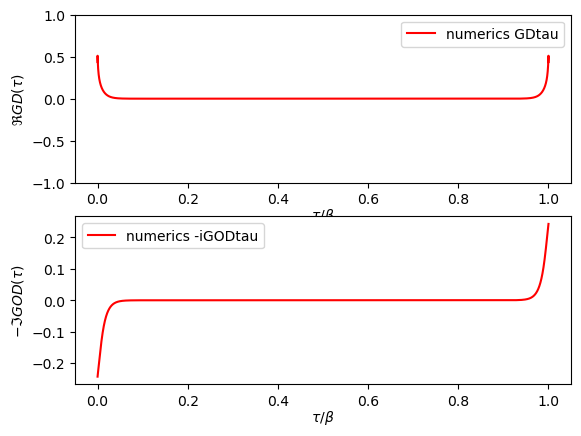

In [4]:
fig, ax = plt.subplots(2)

ax[0].plot(tau/beta, np.real(GDtau), 'r', label = 'numerics GDtau')
#ax[0].plot(tau/beta, np.real(Gconftau), 'b--', label = 'analytical Gtau' )
ax[0].set_ylim(-1,1)
ax[0].set_xlabel(r'$\tau/\beta$',labelpad = 0)
ax[0].set_ylabel(r'$\Re{GD(\tau)}$')
ax[0].legend()

ax[1].plot(tau/beta, -np.imag(GODtau), 'r', label = 'numerics -iGODtau')
#ax[1].plot(tau/beta, np.real(Dconftau), 'b--', label = 'analytical Dtau' )
#ax[1].plot(tau/beta, np.real(FreeDtau), 'g-.', label = 'Free D Dtau' )
#ax[1].set_ylim(0,1)
ax[1].set_xlabel(r'$\tau/\beta$',labelpad = 0)
ax[1].set_ylabel(r'$-\Im{GOD(\tau)}$')
ax[1].legend()


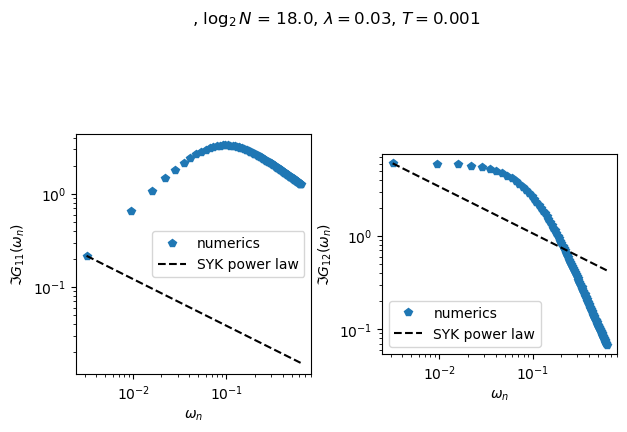

In [5]:
start, stop = Nbig//2, Nbig//2 + 100
startB, stopB = Nbig//2 + 1 , Nbig//2 + 101
#delta = 0.420374134464041 
delta = 0.25

fitGD_val = np.imag(GDomega[start])
conf_fit_GD = 1 * np.abs(omega)**(2*delta - 1)
conf_fit_GD = conf_fit_GD/conf_fit_GD[start] * fitGD_val


fitGOD_val = np.imag(GODomega[start])
#fitD_val = np.real(Dconf[startB:stopB])
conf_fit_GOD = 1 * np.abs(omega[start:stop])**(2*delta-1)
conf_fit_GOD = conf_fit_GOD/conf_fit_GOD[0] * fitGOD_val



fig,(ax1,ax2) = plt.subplots(1,2)
#fig.set_figwidth(10)
titlestring = r', $\log_2{N}$ = ' + str(np.log2(Nbig)) + r', $\lambda = $' + str(lamb) + r', $T = $' + str(1/beta)
fig.suptitle(titlestring)
fig.tight_layout(pad=2)

ax1.loglog(omega[start:stop], np.imag(GDomega[start:stop]),'p',label = 'numerics')
ax1.loglog(omega[start:stop], conf_fit_GD[start:stop],'k--',label = 'SYK power law')
#ax1.loglog(omega[start:]/(g**2), -np.imag(Gconf[start:])*(g**2),'m.',label = 'ES solution')
#ax1.loglog(omega[start:]/(g**2), alt_conf_fit_G[start:],'g--', label = 'alt power law')
#ax1.set_xlim(omega[start]/2,omega[start+15])
#ax1.set_ylim(1e-1,1e1)
ax1.set_xlabel(r'$\omega_n$')
ax1.set_ylabel(r'$\Im{G_{11}(\omega_n)}$')
ax1.set_aspect('equal', adjustable='box')
#ax1.axis('square')
ax1.legend()


ax2.loglog(omega[start:stop], np.imag(GODomega[start:stop]),'p',label='numerics')
ax2.loglog(omega[start:stop], conf_fit_GOD,'k--',label = 'SYK power law')
#ax2.loglog(nu[startB:]/(g**2), np.real(Dconf[startB:]),'m.',label = 'ES solution')
#ax2.loglog(nu[startB:]/(g**2), alt_conf_fit_D,'g--', label = 'alt power law')
#ax2.set_xlim(nu[startB]/2,nu[startB+15])
#ax2.set_ylim(5e-1,100)
ax2.set_xlabel(r'$\omega_n$')
ax2.set_ylabel(r'$\Im{G_{12}(\omega_n)}$',labelpad = None)
ax2.set_aspect('equal', adjustable='box')
ax2.legend()

#plt.savefig('lowenergy_powerlaw_ImagTime_ComplexSYKWormhole.pdf', bbox_inches = 'tight')